### Lab 3 Spark Dataframe Fundamentals

In this lab we would be going through more in depth into Datafames.

Spark dataframes are similiar to Pandas dataframe but there are some differences which we would be going through in this exercise.

Some functions and things that would be introducted are:
1. read()
2. explain()
3. printSchema()
4. inferSchema()
5. DoubleData Type
6. Other Datattypes
7. Data Transformation
8. Data ETL using PySpark

In [2]:
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q https://downloads.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3-scala2.13.tgz
# !tar xf spark-3.5.5-bin-hadoop3-scala2.13.tgz
# !pip install -q findspark
import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3-scala2.13"

os.environ["JAVA_HOME"] = "/usr/local/opt/openjdk@8"
os.environ["SPARK_HOME"] = "/Users/saikeerthan/spark"

import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession

### Create a spark session

In [ ]:
spark = SparkSession.builder.config("spark.master", 'local').getOrCreate()

# SparkSession.builder is used to initiate a new Spark Session, which is the main entry point for the Spark Functionality. 
# .config("spark.master", 'local') - used to set a configuration property, where Spark will run locsally using a single thread. 
# .getOrCreate() - will retrieve the spark session if it exists, otherwise ti will create a new session in the environment. 


25/05/13 12:35:15 WARN Utils: Your hostname, MacBook-Air-8.local resolves to a loopback address: 127.0.0.1; using 172.27.145.58 instead (on interface en0)
25/05/13 12:35:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/13 12:35:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Data Schema

Brazilian E-Commerce Public Dataset by Olist

https://www.kaggle.com/olistbr/brazilian-ecommerce

# What is read()
Reading of data from CSV file and storing the information into a dataframe with headers.

In [ ]:
df = spark.read.option('header', 'true').csv('olist_order_items_dataset.csv')

# .read - accesses the spark DataFrameReader, which is used to load data from sources like JSON, CSV etc. 
# .option('header', 'true') - tells Spark that the first row of the CSV file is a header and does not contain actual data. the standalone option is used to tell Spark details about the first row of the file. 

In [6]:
df.show()

+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.90|        13.29|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.90|        19.93|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.00|        17.87|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18| 12.99|        12.79|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51|199.90|        18.14|
|00048cc3ae777c65d...|            1|ef92

# What is explain()
**explain()**

The `.explain()` method in Spark provides insights into the execution plan of a DataFrame or RDD operation. It is a powerful tool for understanding how Spark will execute a given operation, making it useful for debugging and query optimization

In [7]:
df.explain()

# .explain() - provides detialed insights about the execution plan of the dataframe, understanding how Spark will execute the given operation which is useful for debugging and performance tuning. 

== Physical Plan ==
FileScan csv [order_id#17,order_item_id#18,product_id#19,seller_id#20,shipping_limit_date#21,price#22,freight_value#23] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/Users/saikeerthan/NYP-AI/Year3/Big_Data/Labs/Lab3/olist_order_it..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<order_id:string,order_item_id:string,product_id:string,seller_id:string,shipping_limit_dat...




#What is printSchema()

## Loading data with a proper schema

`df.printSchema()` lists out the data type of each column. Directly loading our csv file into Spark creates a dataframe where all columns are set to String types. While, this is not ideal as we prefer to have numeric types for `price` and datetime types for `date`.

More information of data types supported can be found here:

https://spark.apache.org/docs/latest/sql-ref-datatypes.html

```
root
 |-- order_id: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- freight_value: string (nullable = true)
```


In [ ]:
df.printSchema()

# nullable = true indicates that the column contains null values, however for now, it only infers them as strings and in order to display the correct data types, we need to use inferSchema. 

root
 |-- order_id: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- freight_value: string (nullable = true)



### Let Spark to infer the schema

We can use the `inferSchema` option to ask Spark to guess the best suitable schema of the input data.

In [10]:
df_infer = spark.read.option('header', 'true').option('inferSchema', 'true').csv('olist_order_items_dataset.csv')
df_infer.printSchema()

# "option('inferSchema', 'true')" - tells SPark to automatically detect the data types based on the content of each column and if not for this option Spark will teat all columsn as strings. 

root
 |-- order_id: string (nullable = true)
 |-- order_item_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: timestamp (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)



## Double Data Type

DoubleType : Represents 64-byte double-precision floating point numbers.


DoubleType (from the pyspark.sql.types module) represents the data type for double-precision floating-point numbers. These numbers can hold a wider range of values compared to single-precision floats (FloatType), making them suitable for storing data that requires more precision, such as scientific calculations, financial data, or coordinates.


*   Representation: Double-precision floats typically use 64 bits, allowing for a wider range and higher precision than single-precision floats (32 bits).

*   Use Cases: Ideal for data requiring high accuracy, like scientific computations, financial calculations (percentages, interest rates), or coordinates (latitude, longitude).

* Examples:Scientific constants (e.g., pi, Avogadro's number), currency values, geographical coordinates.

#### When to Use DoubleType:

When you need to store numbers with a wider range or higher precision than single-precision floats can provide.
When dealing with calculations that require accurate results, such as scientific or financial computations.
When the data inherently represents continuous values with a high degree of precision (e.g., scientific measurements, financial data).

# Using a user-specified schema

If there is a fixed schema that you would want you can specified it also

In [12]:
from pyspark.sql.types import StructType, StringType, TimestampType, DoubleType,IntegerType

my_schema = StructType() \
    .add("order_id",StringType(),True) \
    .add("order_item_id",StringType(),True) \
    .add("product_id",StringType(),True) \
    .add("seller_id",StringType(),True) \
    .add("shipping_limit_date",TimestampType(),True) \
    .add("price",DoubleType(),True) \
    .add("freight_value",IntegerType(),True)

# the above code is sued to build a custom scheme for the Dataframe with specific column names and it's specified data types. "True" as the third argument translates the to the column having null values. 

# the below code is used to load the CSV into the custom schema defined above. 
df_user = spark.read \
    .option('header', 'true') \
    .schema(my_schema) \
    .csv('olist_order_items_dataset.csv') # the CSV file is loaded into the DataFrame with the custom schema.

df_user.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: timestamp (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: integer (nullable = true)



25/05/13 13:09:46 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 259230 ms exceeds timeout 120000 ms
25/05/13 13:09:46 WARN SparkContext: Killing executors is not supported by current scheduler.
25/05/13 13:09:47 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$

# Different Data Types

More information can be found here:

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/data_types.html

In [ ]:
from pyspark.sql.types import StructType, StringType, TimestampType, DoubleType,IntegerType

my_schema = StructType() \
    .add("order_id",StringType(),True) \
    .add("order_item_id",StringType(),True) \
    .add("product_id",StringType(),True) \
    .add("seller_id",StringType(),True) \
    .add("shipping_limit_date",TimestampType(),True) \
    .add("price",DoubleType(),True) \
    .add("freight_value",DoubleType(),True)

df_user = spark.read \
    .option('header', 'true') \
    .schema(my_schema) \
    .csv('olist_order_items_dataset.csv')

df_user.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: timestamp (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)



 # Data transform based on columns' schema

 A right schema makes it much easier to process our data as we can utilize native functions Spark provides to supported data types. Check [Spark documentation](https://spark.apache.org/docs/2.3.0/api/sql/index.html)  to learn more about available functions.

 For example, we can extract `year` and `month` information from the `shipping_limit_date` column and add them as expanded columns in our dataframe.

 In Spark, adding a new column is done by calling the `withColumn` interface of a dataframe:

 ```
df_user1 = df_user.withColumn('Y', year('shipping_limit_date'))
df_user1.show(5)
+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+----+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|   Y|
+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+----+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35|  58.9|        13.29|2017|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13| 239.9|        19.93|2017|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30| 199.0|        17.87|2018|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18| 12.99|        12.79|2018|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51| 199.9|        18.14|2017|

 ```

 If we need to add multiple columns, we can pipe a seriese of `withColumn` calls together:
 ```
 df_user1 = df_user \
    .withColumn('Y', year('shipping_limit_date')) \
    .withColumn('M', month('shipping_limit_date'))
 ```

 __Note__: Spark does not allow you to modify an existing dataframe in-place. Every transform creates a new dataframe, and this is why we always assign a new dataframe to the transformed result `df_user1 = df_user.withColumn(...)`. But don't worry such a behavior might waste your ram -- Spark internally maintains linkage among transformed dataframes and minize memory usage automatically.

In [ ]:
from pyspark.sql.functions import year, month,days

df_user1 = df_user \
    .withColumn('Y', year('shipping_limit_date')) \
    .withColumn('M', month('shipping_limit_date'))
df_user1.show(5)

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|   Y|  M|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29|2017|  9|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|2017|  5|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.0|        17.87|2018|  1|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18|12.99|        12.79|2018|  8|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51|199.9|

# Exercise

Can you extract the day and time from the shipping limit date?

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|   Y|  M|  D|  H|Min|  S|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29|2017|  9| 19|  9| 45| 35|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|2017|  5|  3| 11|  5| 13|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.0|        17.87|2018|  1| 18| 14| 48| 30|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18|12.99|        12.79|2018|  8| 15| 10| 

# Data ETL

ETL refers to 'Extract, Transform, and Load', which is almost the first data requirement in any project. Spark dataframe make ETL easy as many typical operations are already abstracted and embedded into Spark dataframe interfaces.

## Filtering

`Filtering` is the most common `Extract` operation, where we want to focus only on data that meets certain criterias.
For example, if we want to look at orders in year 2017, we can use the following filter:

```
df_user1.filter(df_user1.Y == 2017)
```

Similarly, you can also apply conditions with `greater`, `less`, or `not equal` to filter dataframes.


__Note__: `Y` column is of `integer` type. But if you use `df_user1.filter(df_user1.Y == "2017")`, you might be suprised that Spark still returns you the right result. This is becuase Spark trys to cast the column into a matching type to ensure the `comparison` is executable.

In [ ]:
print("*** Compare with an integer")
df_user1.filter(df_user1.Y == 2017).show(10)

print("*** Compare with a string")
df_user1.filter(df_user1.Y == "2017").show(2)

*** Compare with an integer
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|   Y|  M|  D|  H|Min|  S|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29|2017|  9| 19|  9| 45| 35|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|2017|  5|  3| 11|  5| 13|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51|199.9|        18.14|2017|  2| 13| 13| 57| 51|
|00048cc3ae777c65d...|            1|ef92defde845ab845...|6426d21aca402a131...|2017-05-23 03:55:27| 21.9|    

In [ ]:
#### Take note if you just run the filter function it would not change your df that just have the filterd info. You need to store it into another dataframe
df_user1.show(10)
df_69=df_user1.filter(df_user1.Y == 2018)
df_69.show(2)

+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+----+---+---+---+---+---+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|   Y|  M|  D|  H|Min|  S|
+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+----+---+---+---+---+---+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35|  58.9|        13.29|2017|  9| 19|  9| 45| 35|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13| 239.9|        19.93|2017|  5|  3| 11|  5| 13|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30| 199.0|        17.87|2018|  1| 18| 14| 48| 30|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18| 12.99|        12.79|2018|  8| 1

For columns with `string` type, sometime we might need to filter them by prefixes, postfixes or particular patterns. Spark provides a few string functions to make it simple for us to express these logics.

For example, if we want to work with 'order_ids' that starts with `"2"`, we can fitler the dataframe using the `substring` function:

```
df_user.filter(substring(df_user.order_id, 0, 1) == '2').show()
```

`substring` helps us extract a segment of the string based on the start and end location we provides.


__<span style="color:red">Quiz:</span>__: How to filter `order_id` start with `2002`?

In [ ]:
from pyspark.sql.functions import substring

df_user.filter(substring(df_user.order_id,0,4) == '2002').show(5)

#(0,4) it is referring to the index position of the order_id numbers

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|20020569f2b852ebd...|            1|5c46bf87ac19e3912...|54965bbe3e4f07ae0...|2017-11-13 00:50:18| 89.9|        14.36|
|2002527d89799a0cf...|            1|3b037eb584c1cf92f...|4324dd16853115efb...|2017-10-17 18:15:09|78.85|        35.25|
|2002527d89799a0cf...|            2|e59dd207c69d86e89...|e9bc59e7b60fc3063...|2017-10-17 18:15:09|174.0|         0.21|
|2002ea16e75277eaa...|            1|a184d57c818939252...|520b493b57809f446...|2017-07-26 22:30:10| 15.0|         9.94|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+



In [ ]:
df_user.filter(substring(df_user.order_id,0,5) == '20025').show(5)

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|2002527d89799a0cf...|            1|3b037eb584c1cf92f...|4324dd16853115efb...|2017-10-17 18:15:09|78.85|        35.25|
|2002527d89799a0cf...|            2|e59dd207c69d86e89...|e9bc59e7b60fc3063...|2017-10-17 18:15:09|174.0|         0.21|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+



## Exercise

How can I check if my database is there any information with price that is exactly $78.30?

+--------+-------------+----------+---------+-------------------+-----+-------------+
|order_id|order_item_id|product_id|seller_id|shipping_limit_date|price|freight_value|
+--------+-------------+----------+---------+-------------------+-----+-------------+
+--------+-------------+----------+---------+-------------------+-----+-------------+



How about the range between 78.30 to 100?

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|   Y|  M|  D|  H|Min|  S|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|0009792311464db53...|            1|8cab8abac59158715...|530ec6109d11eaaf8...|2018-08-17 12:15:10| 99.9|        27.65|2018|  8| 17| 12| 15| 10|
|000c3e6612759851c...|            1|b50c950aba0dcead2...|218d46b86c1881d02...|2017-08-21 03:33:13| 99.0|        13.71|2017|  8| 21|  3| 33| 13|
|001862358bf858722...|            1|c6dd917a0be2a7045...|7a67c85e85bb2ce85...|2018-02-13 19:10:37|99.99|        13.72|2018|  2| 13| 19| 10| 37|
|001b76dd48a5b1eee...|            1|dbb67791e405873b2...|9c0e69c7bf2619675...|2018-04-02 17:50:17|81.99|        13.01|2018|  4|  2| 17| 

So far we are talking about filtering rows. How should we filter the dataframe by columns, e.g. choose a subset of columns while keep every row?

Column filtering can be done by the `select` interface. If we only want to keep `order_id`, `price`, and `Y`, we can `select` in the following way:

```
df_user1.select('order_id', 'price', 'Y')
```

+--------------------+-----+----+
|            order_id|price|   Y|
+--------------------+-----+----+
|00010242fe8c5a6d1...| 58.9|2017|
|00018f77f2f0320c5...|239.9|2017|
|000229ec398224ef6...|199.0|2018|
+--------------------+-----+----+
only showing top 3 rows



## Exercise:
Try to filter the dataframe whose `order_id` starts with `2002`, and only keep the `order_id` and `price` columns.

+--------------------+-----+
|            order_id|price|
+--------------------+-----+
|20020569f2b852ebd...| 89.9|
|2002527d89799a0cf...|78.85|
|2002527d89799a0cf...|174.0|
|2002ea16e75277eaa...| 15.0|
+--------------------+-----+



## Transform

We have shown how to add columns using the `withColumn` interface previousely. Now let's have a look other transforms.

The simplest transform is mathematic operations, e.g. addition, subtraction, multiplication, division, etc. Check [Spark documentation](https://spark.apache.org/docs/2.3.0/api/sql/index.html)  to learn more about available math functions.
For example, if we want to convert the `price` to use `thousand` dollar as its unit, we can

```
df_user.withColumn('price_in_k', df_user.price/1000).show()
```

We could also combine two columns information together. For example, we can get the `overall_price` by adding/mulitpling `price` and `freight_value` together.

```
df_user.withColumn('overall_price', df_user.price + df_user.freight_value).show()
```
```
df_user.withColumn('overall_price', df_user.price * df_user.freight_value).show()
```

In [ ]:
df_user.show(5)

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.0|        17.87|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18|12.99|        12.79|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51|199.9|        18.14|
+--------------------+-------------+------------

In [ ]:
df_user.withColumn('price_in_k', df_user.price/1000).show(5)

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|price_in_k|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29|    0.0589|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|    0.2399|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.0|        17.87|     0.199|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18|12.99|        12.79|   0.01299|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 1

In [ ]:
df_user.withColumn('Total_price', df_user.price * df_user.freight_value).show(5)


+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+-----------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|Total_price|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+-----------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29|    782.781|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|   4781.207|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.0|        17.87|    3556.13|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18|12.99|        12.79|   166.1421|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-

In [ ]:
df_swe=df_user.withColumn('overall_price', df_user.price + df_user.freight_value)

In [ ]:
df_swe.show(10)

+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+------------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|     overall_price|
+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+------------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35|  58.9|        13.29|             72.19|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13| 239.9|        19.93|            259.83|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30| 199.0|        17.87|            216.87|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18| 12.99|        12.79|             25.78|
|00042b26cf59d7ce6...|     

## Exercise

Find the square root of each order's price.

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+------------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|        sqrt_price|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+------------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29| 7.674633541739957|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|15.488705562441298|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|199.0|        17.87|14.106735979665885|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18|12.99|        12.79|3.6041642581880198|
|00042b26cf59d7ce6...|            

Remember Spark does not allow in-place transform, so each of our transform needs to be expressed by adding a new column into the dataframe. The good thing is that we can always use the `coloumn` filtering to keep only the columns we want.

It means you cannot do transformation on a current column in the dataframe

## Aggregation

Aggregation is a special `transform`: Instead of altering cells on a per-row basis, aggregation works with a group of rows and generate new values from each group. Therefore, aggregation is always used together with the `groupby` operation.



In [ ]:

df_user1.show(2)

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|price|freight_value|   Y|  M|  D|  H|Min|  S|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35| 58.9|        13.29|2017|  9| 19|  9| 45| 35|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|239.9|        19.93|2017|  5|  3| 11|  5| 13|
+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+----+---+---+---+---+---+
only showing top 2 rows



In [ ]:
from pyspark.sql.functions import sum, count

df_user1.groupby('Y',"M").agg(sum('price')).show(5)

+----+---+------------------+
|   Y|  M|        sum(price)|
+----+---+------------------+
|2017|  3|343242.59999999945|
|2017|  8| 560093.3400000128|
|2017| 10| 658020.2300000164|
|2018|  1| 845279.1800000344|
|2018|  3|1030527.8400000384|
+----+---+------------------+
only showing top 5 rows



Our new column's name is "sum(price)", which is not convenient to use later. We could use `alias` to give the column a better name.

In [ ]:
df_user1.groupby('Y', 'M').agg(
    sum('price').alias('Yearly_total')
).show(5)

+----+---+------------------+
|   Y|  M|      Yearly_total|
+----+---+------------------+
|2017|  3|343242.59999999945|
|2017|  8| 560093.3400000128|
|2017| 10| 658020.2300000164|
|2018|  1| 845279.1800000344|
|2018|  3|1030527.8400000384|
+----+---+------------------+
only showing top 5 rows



It is also possible to have multiple aggregation with each group. For example, we can get monthly price and monthly count using the following call

```
df_user1.groupby('Y', 'M').agg(
    sum('price').alias('monthly_total'),
    count('price').alias('montyly_count'),
)
```

In [ ]:
df_user1.groupby('Y', 'M').agg(
    sum('price').alias('monthly_total'),
    count('price').alias('montyly_count'),
).show(5)

+----+---+------------------+-------------+
|   Y|  M|     monthly_total|montyly_count|
+----+---+------------------+-------------+
|2017|  3|343242.59999999945|         2751|
|2017|  8| 560093.3400000128|         5042|
|2017| 10| 658020.2300000164|         5189|
|2018|  1| 845279.1800000344|         7492|
|2018|  3|1030527.8400000384|         8759|
+----+---+------------------+-------------+
only showing top 5 rows



You may notice we use the `show` interface to have a quick look at the dataframe content. However,`show` does not do full operations on the dataframe. If we want to apply the defined operations fully to the dataframe, we need to use `triggers`. The most frequently used trigger is `count`, which tell us how many records we have in a dataframe.

In [ ]:
df_agg = df_user1.groupby('Y', 'M').agg(
    sum('price').alias('monthly_total'),
    count('price').alias('monthly_count'),
)

print(df_agg.count())

26


Another useful trigger is `collect`, which pulls data out of executors and save to the driver. For examples, we may want to have the full content of `df_agg` to see the monthly trend.

In [ ]:
agg_result = df_agg.collect()
print(len(agg_result))

26


The data we collect back are wrapped in the `Row` class. The `Row` class makes it easier for us to address individual fields in each record.

In [ ]:
for i in agg_result:
    print("Type of the object: {}".format(type(i)))
    print(i)
    print(i.Y, i.M, i.monthly_total, i.monthly_count)
    break

Type of the object: <class 'pyspark.sql.types.Row'>
Row(Y=2017, M=3, monthly_total=343242.59999999945, monthly_count=2751)
2017 3 343242.59999999945 2751


There is also an convinient function to convert a Spark dataframe into a Pandas dataframe, `to_pandas`.

<Axes: xlabel='ym'>

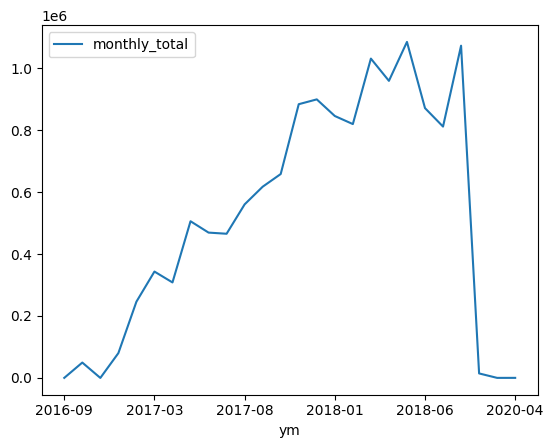

In [ ]:
pandas_df = df_agg.orderBy('Y', 'M').toPandas()
pandas_df['ym'] = pandas_df['Y'].apply(lambda x: '{:04d}'.format(x)) + '-' + pandas_df['M'].apply(lambda x: '{:02d}'.format(x))
pandas_df.plot(x='ym', y='monthly_total')

## Load

The `Load` operation refers to save the processed data in some persistent storage engines, e.g. relational databases, key-value stores, object stores, and file systems.

Spark supports write data to most of these popular engines:
* MySQL
* Postgresql
* Elasticserch
* Cassandra
* Kafka
* AWS S3
* Azure Blob
* HDFS
* Alluxio

Let's take writing to csv files as an example.
```
df_agg.repartition(1).write.mode('overwrite').option('header', 'true').csv('/home/jovyan/output')
```
where
* `repartition(1)` is used to reduce number of output files to 1
* `mode('overwrite')` tells Spark to delete any exisiting data in the output directory
* `option('header', 'true')` controls if a header line should be added to the csv files

You can try to modify the arguments to observe Spark's writting behavior.

In [ ]:
df_agg.repartition(1).write.mode('overwrite').option('header', 'true').csv('output')

In [ ]:
!cat output/*.csv

Y,M,monthly_total,monthly_count
2017,3,343242.59999999945,2751
2017,8,560093.3400000128,5042
2017,10,658020.2300000164,5189
2018,1,845279.1800000344,7492
2018,3,1030527.8400000384,8759
2018,8,1072147.7000000272,8815
2017,7,465282.10000000865,4116
2016,9,194.47,4
2018,5,1084358.550000023,8765
2016,10,49580.55000000016,365
2017,12,898920.9800000272,7726
2020,4,199.98,2
2017,9,617046.1200000154,4724
2016,12,10.9,1
2017,4,308148.3199999984,2364
2018,9,14502.499999999987,99
2018,7,811132.0800000194,6672
2020,2,145.98,2
2018,6,870736.8400000221,6897
2017,2,245982.00999999608,1866
2017,11,883351.6300000291,7355
2017,5,505655.46000000933,4150
2018,2,819228.8500000269,7375
2017,6,469001.05000000703,3801
2017,1,80124.73999999998,681
2018,4,958729.7000000284,7637


### **Trying it out**

Follow the questions stated below to find out some of the common commands that we use for data cleaning and processing that is different from Pandas

[List to functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html#)

How do we determine is there any null(Empty) values in the dataframe?

[Click Me](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.isnull.html)

In [ ]:
from pyspark.sql.functions import *
#filter data by null values


+--------+-------------+----------+---------+-------------------+-----+-------------+
|order_id|order_item_id|product_id|seller_id|shipping_limit_date|price|freight_value|
+--------+-------------+----------+---------+-------------------+-----+-------------+
+--------+-------------+----------+---------+-------------------+-----+-------------+



Given that it can only check one by one as shown above. How can we check all the columns?

Column 'order_id' has 0 null values
Column 'order_item_id' has 0 null values
Column 'product_id' has 0 null values
Column 'seller_id' has 0 null values
Column 'shipping_limit_date' has 0 null values
Column 'price' has 0 null values
Column 'freight_value' has 0 null values


If there is any null values is there a way to drop it?


How can I check the shape of my dataframe? (Pandas `.shape()` )

Shape of DataFrame: (112650, 7)


Determine the spread of the data using

```
.summary()
```

```
.descirbe()
```

What is the difference?

+-------+--------------------+------------------+--------------------+--------------------+-------------------+------------------+------------------+
|summary|            order_id|     order_item_id|          product_id|           seller_id|shipping_limit_date|             price|     freight_value|
+-------+--------------------+------------------+--------------------+--------------------+-------------------+------------------+------------------+
|  count|              112650|            112650|              112650|              112650|             112650|            112650|            112650|
|   mean|                NULL|1.1978339991122948|                NULL|                NULL|               NULL|120.65373901477311| 19.99031992898562|
| stddev|                NULL|0.7051240313951734|                NULL|                NULL|               NULL| 183.6339280502597|15.806405412296998|
|    min|00010242fe8c5a6d1...|                 1|00066f42aeeb9f300...|0015a82c2db000af6...|2016-09-1

The boss would like to determine which product has sold the most?

How can we do that?

+--------------------+-----+
|          product_id|count|
+--------------------+-----+
|aca2eb7d00ea1a7b8...|  527|
|99a4788cb24856965...|  488|
|422879e10f4668299...|  484|
|389d119b48cf3043d...|  392|
|368c6c730842d7801...|  388|
|53759a2ecddad2bb8...|  373|
|d1c427060a0f73f6b...|  343|
|53b36df67ebb7c415...|  323|
|154e7e31ebfa09220...|  281|
|3dd2a17168ec895c7...|  274|
|2b4609f8948be1887...|  260|
|7c1bd920dbdf22470...|  231|
|a62e25e09e05e6faf...|  226|
|5a848e4ab52fd5445...|  197|
|bb50f2e236e5eea01...|  195|
|e0d64dcfaa3b6db5c...|  194|
|e53e557d5a159f5aa...|  183|
|42a2c92a0979a949c...|  183|
|b532349fe46b38fbc...|  169|
|35afc973633aaeb6b...|  165|
+--------------------+-----+
only showing top 20 rows



How do we find the top 10 items only?

+--------------------+-----+
|          product_id|count|
+--------------------+-----+
|aca2eb7d00ea1a7b8...|  527|
|99a4788cb24856965...|  488|
|422879e10f4668299...|  484|
|389d119b48cf3043d...|  392|
|368c6c730842d7801...|  388|
|53759a2ecddad2bb8...|  373|
|d1c427060a0f73f6b...|  343|
|53b36df67ebb7c415...|  323|
|154e7e31ebfa09220...|  281|
|3dd2a17168ec895c7...|  274|
+--------------------+-----+



How do we determine the total amount earned for the top three items?

['aca2eb7d00ea1a7b8ebd4e68314663af',
 '99a4788cb24856965c36a24e339b6058',
 '422879e10f46682990de24d770e7f83d']

Shape of DataFrame: (1499, 7)


+------------------+
|        sum(price)|
+------------------+
|107211.67999999788|
+------------------+

